In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import sys
import unittest
%matplotlib inline

sys.path.append('/Users/rkp/Dropbox/Repositories')
from figure_magic import axis_tools
from unittest_jupyter import run

from network import RateBasedModel

In [2]:
FONT_SIZE = 20

In [3]:
class RateModelNetworkTestCase(unittest.TestCase):
    
    def test0_unconnected_populations_with_different_timescales_respond_to_delta_pulse_with_exponential_decay(self):
        # define network drive
        drives = 10*[np.array([0, 0, 0, 0])] + 10*[2*np.array([3, 4, 6, 10])] + 60*[np.array([0, 0, 0, 0])]
        # define network parameters
        taus = [3, 5, 10, 20]
        restings = [-20, -10, 0, 10]
        v_ths = [-10, -1, 8, 17]
        gs = [.5, .5, .5, .5]
        
        # dake new network
        nodes = [{'tau': t, 'resting': resting, 'threshold': th, 'steepness': g}
                for t, resting, th, g in zip(taus, restings, v_ths, gs)]
        weights = np.zeros((len(taus), len(taus)))
        
        ntwk = RateBasedModel(nodes, weights)
        ntwk.store_voltages = True
        
        # initialize and run network
        ntwk.vs = np.array([-20, -10, 0, 10])
        for drive in drives:
            ntwk.step(drive)
        
        # make plots
        fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
        axs[0].plot(ntwk.vs_history, lw=2)
        axs[1].plot(ntwk.rs_history, lw=2)
        axs[2].plot(drives, lw=2)
        
        axs[1].set_ylim(-.1, 1.1)
        axs[2].set_ylim(0, 45)
        
        axs[0].set_ylabel('voltage')
        axs[1].set_ylabel('firing rate')
        axs[2].set_ylabel('drive')
        axs[2].set_xlabel('t')
        
        axs[0].set_title('Uncoupled Populations')
        
        for ax in axs:
            axis_tools.set_fontsize(ax, 20)
            
    def test1_self_connections_yield_bistable_systems_given_correct_parameters(self):
        # define network drive
        drives = 10*[np.array([0, 0])] + 20*[4*np.array([1, 1])] + \
                 60*[np.array([0, 0])] + 20*[-4*np.array([1, 1])] + 60*[np.array([0, 0])]
        # define network parameters
        taus = [10, 10]
        restings = [0, 0]
        v_ths = [4, 4]
        gs = [2.5, 2.5]
        w_selfs = [7.5, 5.5]
        
        nodes = [{'tau': t, 'resting': resting, 'threshold': th, 'steepness': g}
                for t, resting, th, g in zip(taus, restings, v_ths, gs)]
        weights = np.diag(w_selfs)
        
        # make network
        ntwk = RateBasedModel(nodes, weights)
        ntwk.store_voltages = True
        
        # initialize and run network
        ntwk.vs = np.array(restings)
        for drive in drives:
            ntwk.step(drive)
            
        # make plots
        fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
        axs[0].plot(ntwk.vs_history, lw=2)
        axs[1].plot(ntwk.rs_history, lw=2)
        axs[2].plot(drives, lw=2)
        
        axs[1].set_ylim(-.1, 1.1)
        axs[2].set_ylim(-5, 5)
        
        axs[0].set_ylabel('voltage')
        axs[1].set_ylabel('firing rate')
        axs[2].set_ylabel('drive')
        axs[2].set_xlabel('t')
        
        axs[0].set_title('Self-Connected Populations')
        
        for ax in axs:
            axis_tools.set_fontsize(ax, 20)
            
    def test2_input_populations_coupled_to_bistable_population(self):
        # define network drive
        drives = 10*[np.array([0, 0, 0])] + 20*[4*np.array([1, 1, 1])] + 60*[np.array([0, 0, 0])]

### Uncoupled populations
This network contains 4 uncoupled populations, each with a different resting potential, time constant, and threshold.

...
----------------------------------------------------------------------
Ran 3 tests in 0.337s

OK


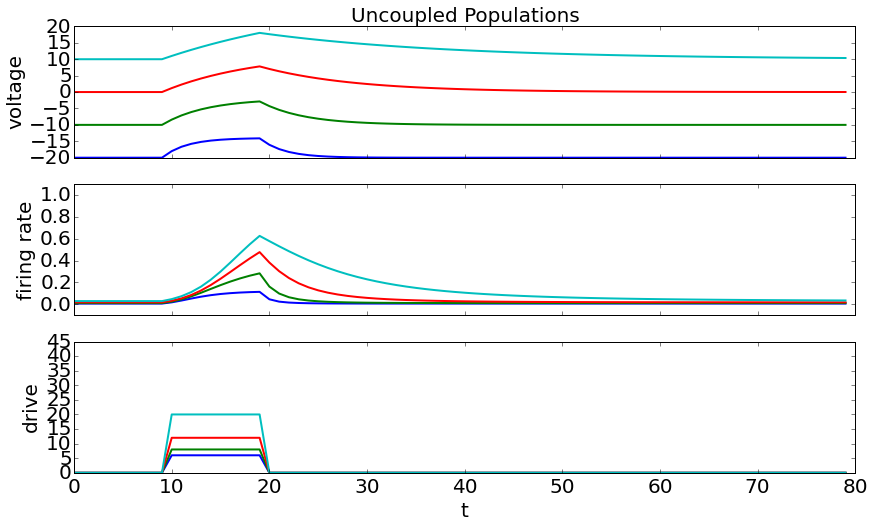

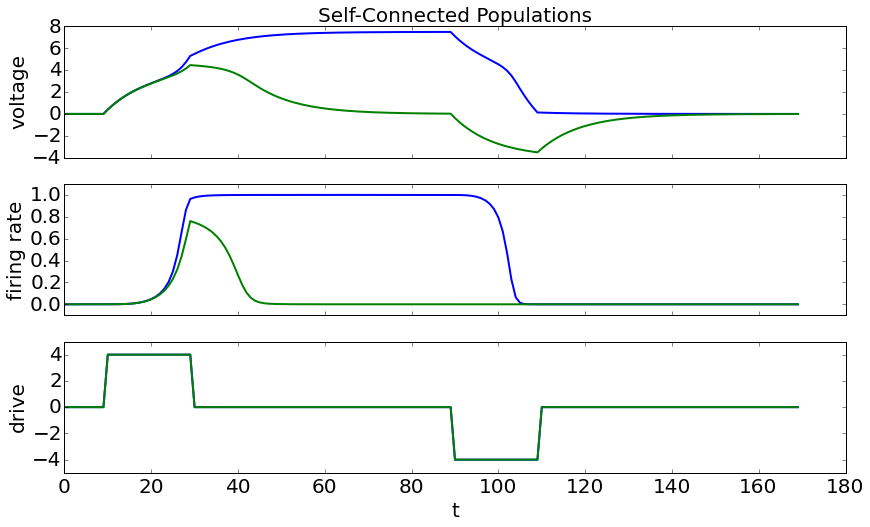

In [4]:
run(RateModelNetworkTestCase)